#Tarefa de Regressão - parte 1

## Nesta tarefa, você deve carregar um dataset sobre tratores , construir modelos de Regressão com os algoritmos vistos em aula e predizer o preço de venda (SalesPrice).

Dica: Para toda a tarefa, além da biblioteca pandas e numpy, você pode querer explorar funções da biblioteca sklearn.ensemble (em particular o pacote RandomForestRegressor), sklearn.neighbors (KNeighborsRegressor) e sklearn.tree (DecisionTreeRegressor).
Além disso, você vai precisar usar funções de pré-processamento e de pós-procesamento (das bibliotecas sklearn.preprocessing, sklearn.model_selection e sklearn.metrics)

IMPORTANTE: Ao realizar etapas de pré-processamento, verifique se o procedimento funcionou.


###Importe os pacotes e carregue o arquivo com os dados
O dataset a ser utilizado encontra-se no arquivo **Tratores.csv**, disponível no EAD.


Este dataset contém dados sobre as vendas de tratores, descritas pelos seguintes atributos/variáveis:



*   SalesID: unique identifier of a particular sale of a machine at auction
*   MachineID: dentifier for a particular machine;  machines may have multiple sales
*   ModelID: identifier for a unique machine model
*   YearMade:year of manufacturer of the Machine
*   MachineHoursCurrentMeter: current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale
*   Saledate:  time of sale
*   Product Group: Identifier for top-level hierarchical grouping of fiModelDesc
*   **Saleprice (target)**:cost of sale in USD












In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree



### Pré-processe a base de dados

Dica: avalie a necessidade de converter os tipos das variáveis, normalizar os dados, ...

In [2]:
df = pd.read_csv('Tratores.csv',sep=',')
df.head()

,SalesID,SalePrice,MachineID,ModelID,YearMade,MachineHoursCurrentMeter,saledate,ProductGroup
0,1139246,66000,999089,3157,2004,68,11/16/2006 0:00,WL
1,1139248,57000,117657,77,1996,4640,3/26/2004 0:00,WL
2,1139249,10000,434808,7009,2001,2838,2/26/2004 0:00,SSL
3,1139251,38500,1026470,332,2001,3486,5/19/2011 0:00,TEX
4,1139253,11000,1057373,17311,2007,722,7/23/2009 0:00,SSL


#### Transforme a variável saledate em três outras variáveis: ano, mês e dia.
 Dica: Uma estratégia pode ser transformar a variável em *datetime*.

In [3]:
df['saledate'] = pd.to_datetime(df['saledate'])
df['Ano'] = df['saledate'].dt.year
df['Mês'] = df['saledate'].dt.month
df['Dia'] = df['saledate'].dt.day

df.head()

,SalesID,SalePrice,MachineID,ModelID,YearMade,MachineHoursCurrentMeter,saledate,ProductGroup,Ano,Mês,Dia
0,1139246,66000,999089,3157,2004,68,2006-11-16,WL,2006,11,16
1,1139248,57000,117657,77,1996,4640,2004-03-26,WL,2004,3,26
2,1139249,10000,434808,7009,2001,2838,2004-02-26,SSL,2004,2,26
3,1139251,38500,1026470,332,2001,3486,2011-05-19,TEX,2011,5,19
4,1139253,11000,1057373,17311,2007,722,2009-07-23,SSL,2009,7,23


#### Implemente outras etapas de pré-processamento que julgue necessárias.


In [4]:
missing_values = df.isnull().sum()

print("Valores ausentes em cada coluna:")
print(missing_values)

Valores ausentes em cada coluna:
SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
YearMade                    0
MachineHoursCurrentMeter    0
saledate                    0
ProductGroup                0
Ano                         0
Mês                         0
Dia                         0
dtype: int64


In [5]:
#normalizando colunas
scaler = MinMaxScaler()
df[['SalePrice', 'YearMade','MachineHoursCurrentMeter']] = scaler.fit_transform(df[['SalePrice', 'YearMade', 'MachineHoursCurrentMeter']])

In [6]:
df = pd.get_dummies(df, columns=['ProductGroup'])

In [7]:
df = df.replace({True: 1, False: 0})
print(df)

     SalesID  SalePrice  MachineID  ModelID  YearMade  \
0    1139246   0.449541     999089     3157  0.904762   
1    1139248   0.383486     117657       77  0.714286   
2    1139249   0.038532     434808     7009  0.833333   
3    1139251   0.247706    1026470      332  0.833333   
4    1139253   0.045872    1057373    17311  0.976190   
..       ...        ...        ...      ...       ...   
995  1142566   0.207339    1069733     5428  0.928571   
996  1142567   0.420183     531918    23162  0.928571   
997  1142568   0.023853    1064508    17472  0.761905   
998  1142577   0.082569    1046210    13391  0.904762   
999  1142582   0.071560    1031625     9578  0.952381   

     MachineHoursCurrentMeter   saledate   Ano  Mês  Dia  ProductGroup_BL  \
0                    0.001799 2006-11-16  2006   11   16                0   
1                    0.122764 2004-03-26  2004    3   26                0   
2                    0.075087 2004-02-26  2004    2   26                0   
3      

### Crie os conjuntos de treinamento e de teste

Atenção: Selecione aleatoriamente e sem reposição (para que não se repitam) 75% das observações para o conjunto de treinamento. As 25% observações restantes serão usadas para o conjunto de teste. Fixe a semente de geração de dados aleatórios.

In [8]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=50)

print("Tamanho do conjunto (treinamento):", len(train_df))
print("Tamanho do conjunto (teste):", len(test_df))

Tamanho do conjunto (treinamento): 750
Tamanho do conjunto (teste): 250


### Construa modelos de KNN, Árvore para Regressão e Random Forest.

Utilizando cada um deles, faça a predição do atributo SalePrice no conjunto teste.

In [9]:
#knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# separando features e o target
X_train_knn = train_df.drop(columns=['SalePrice', 'saledate'])
y_train_knn = train_df['SalePrice']
X_test_knn = test_df.drop(columns=['SalePrice', 'saledate'])

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_knn, y_train_knn)

# predições
y_pred_knn = knn_model.predict(X_test_knn)

In [10]:
#arvore de regressao
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_knn, y_train_knn)

# predições
y_pred_dt = dt_model.predict(X_test_knn)


In [11]:
#random forest
from sklearn.ensemble import RandomForestRegressor

# Construindo e treinando o modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_knn, y_train_knn)

# Fazendo predições no conjunto de teste
y_pred_rf = rf_model.predict(X_test_knn)

### Pós-processamento: Avalie cada modelo de regressão

Calcule as medidas de desempenho vistas em aula ( raiz do erro quadrático médio, R2)

In [12]:
# knn --> erro quadrático médio (MSE) no conjunto de teste
mse_knn = mean_squared_error(test_df['SalePrice'], y_pred_knn)
print("Erro quadrático médio (MSE) -> KNN:", mse_knn)

# arvore de decisao --> erro quadrático médio (MSE) no conjunto de teste
mse_dt = mean_squared_error(test_df['SalePrice'], y_pred_dt)
print("MSE-> Árvore de Decisão:", mse_dt)

# random forest --> erro quadrático médio (MSE) no conjunto de teste
mse_rf = mean_squared_error(test_df['SalePrice'], y_pred_rf)
print("MSE -> Random Forest:", mse_rf)

Erro quadrático médio (MSE) -> KNN: 0.03860644367039811
MSE-> Árvore de Decisão: 0.019336321993098225
MSE -> Random Forest: 0.015984602812019185


In [13]:
from sklearn.metrics import r2_score

# raiz quadrada do erro quadrático médio (RMSE)
rmse_knn = np.sqrt(mse_knn)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)

print("Raiz do Erro Quadrático Médio (RMSE) -->  KNN:", rmse_knn)
print("Raiz do Erro Quadrático Médio (RMSE) -->  Árvore de Decisão:", rmse_dt)
print("Raiz do Erro Quadrático Médio (RMSE) --> Random Forest:", rmse_rf)

Raiz do Erro Quadrático Médio (RMSE) -->  KNN: 0.19648522506895552
Raiz do Erro Quadrático Médio (RMSE) -->  Árvore de Decisão: 0.13905510416053854
Raiz do Erro Quadrático Médio (RMSE) --> Random Forest: 0.12643022902778903


In [14]:
#  coeficiente de determinação (R²)
r2_knn = r2_score(test_df['SalePrice'], y_pred_knn)
r2_dt = r2_score(test_df['SalePrice'], y_pred_dt)
r2_rf = r2_score(test_df['SalePrice'], y_pred_rf)

print("Coeficiente de Determinação (R²) --> KNN:", r2_knn)
print("Coeficiente de Determinação (R²) --> Árvore de Decisão:", r2_dt)
print("Coeficiente de Determinação (R²) --> Random Forest:", r2_rf)

Coeficiente de Determinação (R²) --> KNN: -0.07620418814807217
Coeficiente de Determinação (R²) --> Árvore de Decisão: 0.46097519652378294
Coeficiente de Determinação (R²) --> Random Forest: 0.5544086723178586


#### Qual modelo apresentou melhor desempenho segundo as métricas calculadas?

O Erro Quadrático Médio (MSE) é uma métrica que mede a média dos quadrados dos erros. Logo, quanto menor o RMSE, melhor o desempenho do modelo. Além disso, quanto maior o R² , melhor a capacidade de previsão do modelo em relação aos outros. Sendo assim, como o Random Forest tem menor RMSE e maior R^2, ele possui melhor desempenho.

#### Avalie a importância dos atributos (feature importances) na construção dos modelos de Árvore de Decisão e Random Forest Regressor.

Diga os três atributos que apresentaram maior relevância na predição de cada modelo.



Feature Importances: AR

In [15]:
importances_dt = dt_model.feature_importances_

importances_dt_df = pd.DataFrame({'atributo': X_train_knn.columns, 'importância': importances_dt})
importances_dt_df = importances_dt_df.sort_values(by='importância', ascending=False)

print(" três atributos mais importantes --> Árvore de Decisão :")
importances_dt_df.head(3)

 três atributos mais importantes --> Árvore de Decisão :


,atributo,importância
4,MachineHoursCurrentMeter,0.195782
10,ProductGroup_SSL,0.166642
3,YearMade,0.124379


Feature Importances Random forest

In [16]:
importances_rf = rf_model.feature_importances_

importances_rf_df = pd.DataFrame({'atributo': X_train_knn.columns, 'importância': importances_rf})
importances_rf_df = importances_rf_df.sort_values(by='importância', ascending=False)

print(" três atributos mais importantes --> Random Forest:")
importances_rf_df.head(3)

 três atributos mais importantes --> Random Forest:


,atributo,importância
10,ProductGroup_SSL,0.165323
4,MachineHoursCurrentMeter,0.146476
2,ModelID,0.136366


#### Elabore um gráfico para visualizar a árvore de regressão, utilizando a biblioteca dtreeviz (precisa ser instalada). (EXTRA)

Para isso, treinem novamente o modelo de árvore de regressão, estipulando como parâmetro de máxima profundidade da árvore (max_depth) um número até 4.

Essa visualização é muito interessante e nos mostra a distribuição do atributo de decisão em cada nó e a distribuição e a média da resposta da folha.

In [17]:
!pip install -U dtreeviz
import dtreeviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


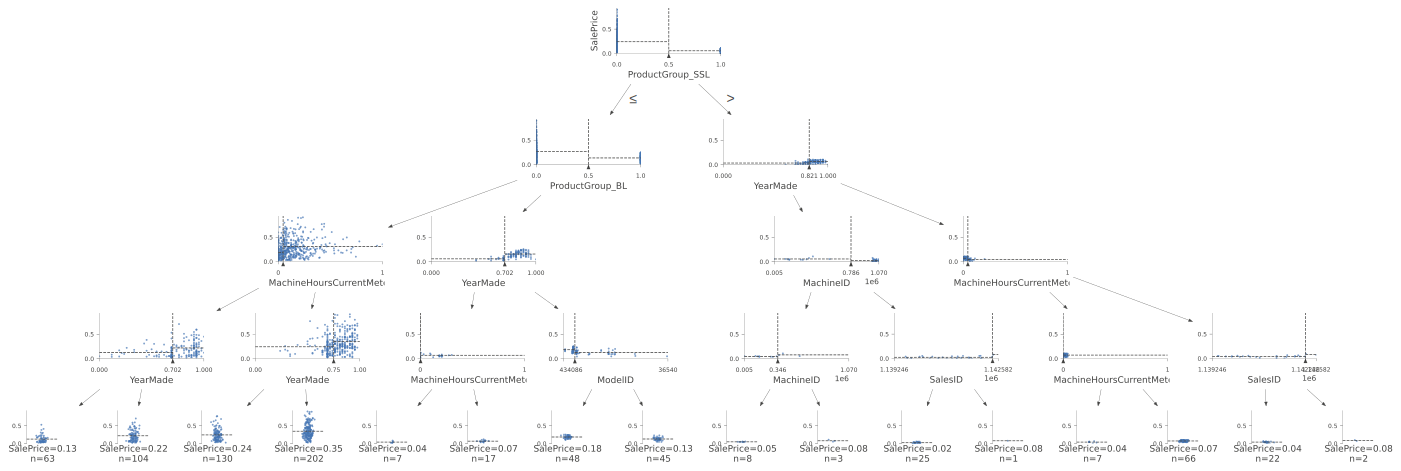

In [18]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

# não produzir warning "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)


# separando o dataset em treino e teste
train_df, test_df = train_test_split(df, test_size=0.25, random_state=50)

X_train_dt = train_df.drop(columns=['SalePrice', 'saledate'])
y_train_dt = train_df['SalePrice']
X_test_dt = test_df.drop(columns=['SalePrice', 'saledate'])

#parâmetro de máxima profundidade da árvore (max_depth) um número até 4
max_depth = 4
dt_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

# Visualização do gráfico
viz = dtreeviz.model(
    dt_model,
    X_train_dt,
    y_train_dt,
    target_name='SalePrice',
    feature_names=X_train_dt.columns

)

viz.view()

#Tarefa de Regressão - parte 2

## Nesta segunda parte da tarefa, você deve construir um modelo de Regressão Linear Múltipla (RLM) predizer o preço de venda (SalesPrice). Em seguida, você deve retornar à tarefa de classificação e construir um modelo de Regressão Logística com os dados de heart disease.

In [19]:
df_tratores = pd.read_csv('Tratores.csv',sep=',')
df_tratores.head()

,SalesID,SalePrice,MachineID,ModelID,YearMade,MachineHoursCurrentMeter,saledate,ProductGroup
0,1139246,66000,999089,3157,2004,68,11/16/2006 0:00,WL
1,1139248,57000,117657,77,1996,4640,3/26/2004 0:00,WL
2,1139249,10000,434808,7009,2001,2838,2/26/2004 0:00,SSL
3,1139251,38500,1026470,332,2001,3486,5/19/2011 0:00,TEX
4,1139253,11000,1057373,17311,2007,722,7/23/2009 0:00,SSL


### Realize as etapas de pré-processamento consideradas apropriadas para o modelo de Regressão Linear Múltipla.

Obs: Tome o cuidado de não realizar o pré-processamento no dataset resultante do pré-processamento da primeira parte.

In [20]:
dados_faltantes = df_tratores.isnull().sum()
print(dados_faltantes)

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
YearMade                    0
MachineHoursCurrentMeter    0
saledate                    0
ProductGroup                0
dtype: int64


In [21]:
df_tratores['saledate'] = pd.to_datetime(df_tratores['saledate'])
df_tratores['Ano'] = df_tratores['saledate'].dt.year
df_tratores['Mês'] = df_tratores['saledate'].dt.month
df_tratores['Dia'] = df_tratores['saledate'].dt.day


In [22]:
df_tratores=df_tratores.drop(columns=['saledate'])

df_tratores.head()

,SalesID,SalePrice,MachineID,ModelID,YearMade,MachineHoursCurrentMeter,ProductGroup,Ano,Mês,Dia
0,1139246,66000,999089,3157,2004,68,WL,2006,11,16
1,1139248,57000,117657,77,1996,4640,WL,2004,3,26
2,1139249,10000,434808,7009,2001,2838,SSL,2004,2,26
3,1139251,38500,1026470,332,2001,3486,TEX,2011,5,19
4,1139253,11000,1057373,17311,2007,722,SSL,2009,7,23


In [23]:
#normalizando colunas
scaler = MinMaxScaler()
df_tratores[['SalePrice', 'YearMade','MachineHoursCurrentMeter']] = scaler.fit_transform(df_tratores[['SalePrice', 'YearMade', 'MachineHoursCurrentMeter']])

In [24]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['ProductGroup']

onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X_categorical_encoded = onehot_encoder.fit_transform(df_tratores[categorical_cols])

X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

X_encoded = pd.concat([df_tratores.drop(categorical_cols, axis=1), X_categorical_df], axis=1)


X_encoded=X_encoded.drop(columns=['SalesID','MachineID'])
X_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


,SalePrice,ModelID,YearMade,MachineHoursCurrentMeter,Ano,Mês,Dia,ProductGroup_MG,ProductGroup_SSL,ProductGroup_TEX,ProductGroup_TTT,ProductGroup_WL
0,0.449541,3157,0.904762,0.001799,2006,11,16,0.0,0.0,0.0,0.0,1.0
1,0.383486,77,0.714286,0.122764,2004,3,26,0.0,0.0,0.0,0.0,1.0
2,0.038532,7009,0.833333,0.075087,2004,2,26,0.0,1.0,0.0,0.0,0.0
3,0.247706,332,0.833333,0.092232,2011,5,19,0.0,0.0,1.0,0.0,0.0
4,0.045872,17311,0.976190,0.019103,2009,7,23,0.0,1.0,0.0,0.0,0.0


### Investigação da base de dados:

### Elabore gráficos de dispersão entre variáveis explicativas e a variável resposta, Saleprice. É possível visualizar alguma relação linear entre as variáveis? Interprete os gráficos.

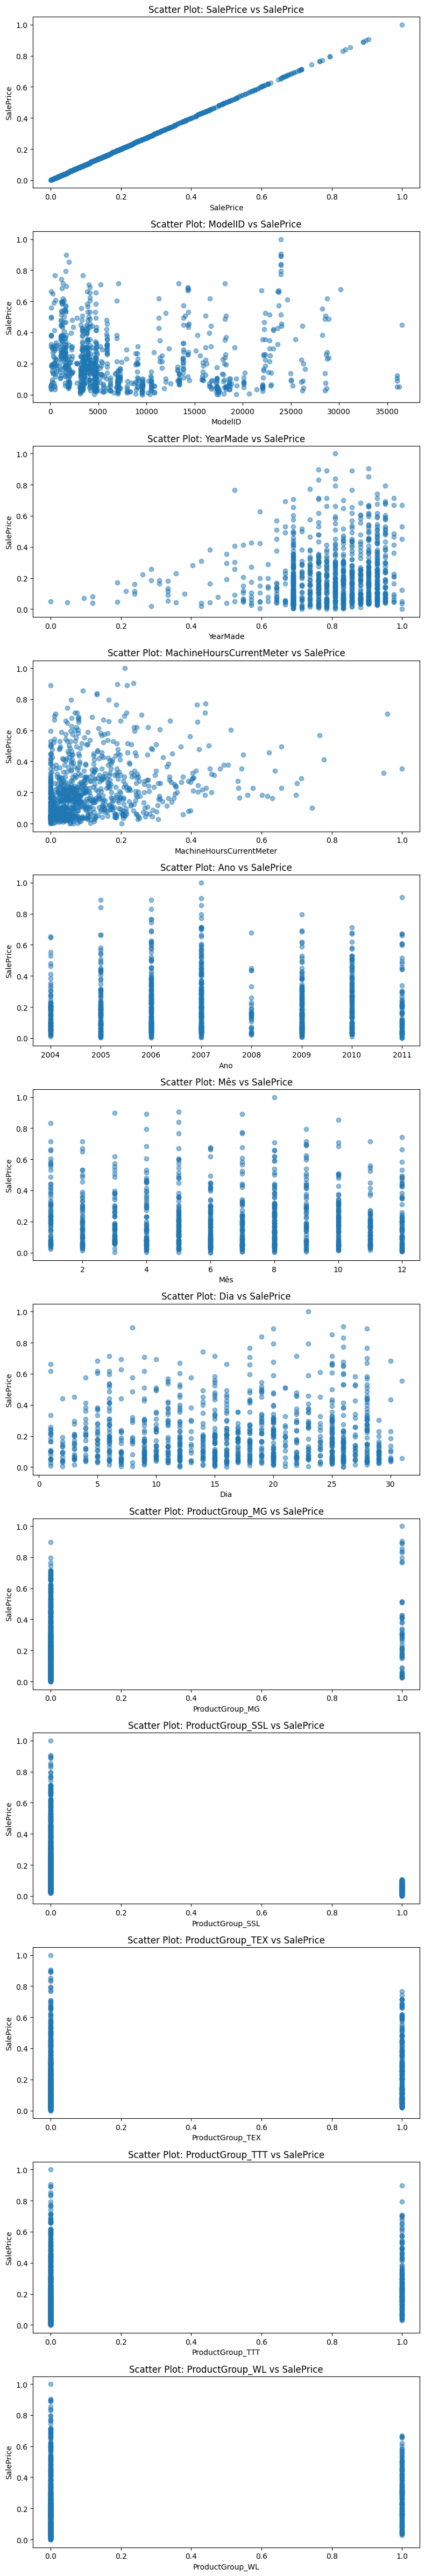

In [25]:
features = X_encoded.columns
num_plots = (len(features))

plt.figure(figsize=(8, 4* num_plots))

for i, feature in enumerate(features[:num_plots]):
    plt.subplot(num_plots, 1, i + 1)
    plt.scatter(X_encoded[feature], X_encoded['SalePrice'], alpha=0.5)  # Substitua 'y' pelo nome do target correspondente ao preço de venda
    plt.title(f'Scatter Plot: {feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

O mais próximo de ser um gráfico linear é o YearMade vs SalesPrice, porém, nenhum dos gráficos aparenta ter um comportamento linear forte. Por isso, o objetivo para essa tarefa é usarmos a regressão linear múltipla para prever o preço do SalesPrice.

### Repita o mesmo procedimento realizado anteriormente para os demais modelos:

### Divisão do conjunto de dados, treinamento, previsão e avaliação do modelo a partir das mesmas medidas de desempenho (R2 e RSME).
Apresente as etapas de forma organizada.

In [26]:
#knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

sem_saleprice_df=X_encoded.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(sem_saleprice_df, X_encoded['SalePrice'], test_size=0.25, random_state=42)

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

rmse_knn = sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("RMSE:", rmse_knn)
print("R^2:", r2_knn)

RMSE: 0.14691744265969064
R^2: 0.35904447346360524


In [27]:
#regressao linear multipla

from sklearn.linear_model import LinearRegression

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

y_pred_lm = lm_model.predict(X_test)

rmse_lm = sqrt(mean_squared_error(y_test, y_pred_lm))
r2_lm = r2_score(y_test, y_pred_lm)

print("RMSE:", rmse_lm)
print("R^2:", r2_lm)

RMSE: 0.14220330085638633
R^2: 0.3995172566490315


In [28]:
#arvore de regressao

from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

rmse_tree = sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("RMSE:", rmse_tree)
print("R^2:", r2_tree)

RMSE: 0.16518301190477847
R^2: 0.18976325007932682


In [30]:
#random forest

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE:", rmse_rf)
print("R^2:", r2_rf)

RMSE: 0.12174334067298714
R^2: 0.5598794917947922


####  Explique o que cada uma das métricas calculadas, R2 e RSME, dizem sobre o modelo treinado.

O R^2 consiste em uma medida que demonstra a variância do target (SalePrice) em relação às features do dataframe. Essa medida indica a adequação dos dados ao modelo. Quanto mais alta a medida (mais próximo de 1), melhor foi essa adequação do modelo treinado. Já o RMSE indica a média da diferença entre os valores desejados e os valores previstos no target (SalePrice). Sendo assim, quanto menor o erro (RMSE mais próximo de zero), melhor o desempenho do modelo selecionado.

#### Compare os erros obtidos pelos modelos de Regressão Linear Múltipla, KNN, Árvore de Regressão e Random Forest.

#### Identifique o modelo que apresentou o melhor desempenho e o que obteve o pior. Discuta possíveis razões para essas diferenças de desempenho, em especial o RLM.

Como visto nos prints acima, o random forest apresentou melhor desempenho, pois teve o menor RMSE e o maior R^2. Já o pior foi a arvore de regressão, visto que teve o menor R^2 e o maior RMSE. O random forest possuiu melhor desempenho, visto que ele consegue construir várias árvores de decisão diferentes com subconjuntos de colunas do dataset e depois combina as previsão de cada arvore. Com isso, há uma maior robustez e consegue capturar padrões não lineares. Como o dataset nao é linear (visto nos gráficos de scatterplot), ele prediz melhor. Por outro lado, o RLM tem como premissa que os dados terão relações lineares entre eles, ajustando uma melhor reta. Porém, nosso dataset não é linear. Já a arvore de regressao preve apenas um cenário de arvore de decisão, baseada na variancia. Logo, nao é o suficiente para prever corretamente, tendo um desempenho menor.

### Para o modelo de Regressão Logística:
### Recupere a tarefa de Classificação e execute o modelo de Regressão Logística com os dados de heart-disease, se atentando às etapas desejáveis para alcançar um bom desempenho do modelo. Em seguida, compare os resultados das medidas de desempenho obtidos com os modelos anteriores de classificação (..) com o modelo de Regressão Logística. Comente possíveis motivos para tal desempenho.

Dessa forma, vocês irão entregar dois notebooks:

*   Notebook Regressão 2 (esse).
*   Notebook Classificação 2 com as adições referentes à Regressão Logística.

